In [10]:
import matplotlib.pyplot as plt
from datetime import datetime
import json
import requests
x_date = datetime.now()

In [11]:
regions = requests.get('https://visitor-counter-adithyarao3103.vercel.app/regions?name=website&password=Adithya@123').json()['regions']

In [12]:
csv = 'Country, Region, City';
for region in regions:
    csv += '\n' + region['country'] + ', ' + region['region'] + ', ' + region['city']
with open('regions.csv', 'w', encoding='utf-8') as f:
    f.write(csv)

In [13]:
with open('country_data.json', 'r') as f:
    country_data = json.load(f)

country_from_code = country_data['country_from_code']
continent_from_country = country_data['continent_from_country']

In [14]:
with open('regions.csv', 'r', encoding='utf-8') as f:
    codes = f.read()
    codes = codes.split('\n')[1:]
    codes = [x.split(',')[0] for x in codes]

In [15]:
len(codes)

1093

In [16]:
continent_colors = {
    'Europe': '#66B2FF',
    'Asia': '#FF9999', 
    'Africa': '#99FF99',
    'North America': '#FFCC99',
    'South America': '#FF99CC',
    'Oceania': '#99FFFF',
    'Antarctica': '#E0E0E0',
}

In [17]:
country_list = {}
continent_count = {}
continent_country_count = {}
colors = []

for code in codes:
    country = country_from_code[code]
    if country in country_list:
        country_list[country] += 1
    else:
        country_list[country] = 1

sorted_countries = dict(sorted(country_list.items(), key=lambda x: x[1]))

for country in sorted_countries.keys():
    colors.append(continent_colors[continent_from_country[country]])
    continent = continent_from_country[country]
    if continent in continent_count:
        continent_count[continent] += sorted_countries[country]
        continent_country_count[continent] += 1
    else:
        continent_count[continent] = sorted_countries[country]
        continent_country_count[continent] = 1


sorted_continents = dict(sorted(continent_count.items(), key=lambda x: x[1], reverse=True))



In [18]:
total_visitors = 0
for count in sorted_continents.values():
    total_visitors += count

total_countries = len(sorted_countries)

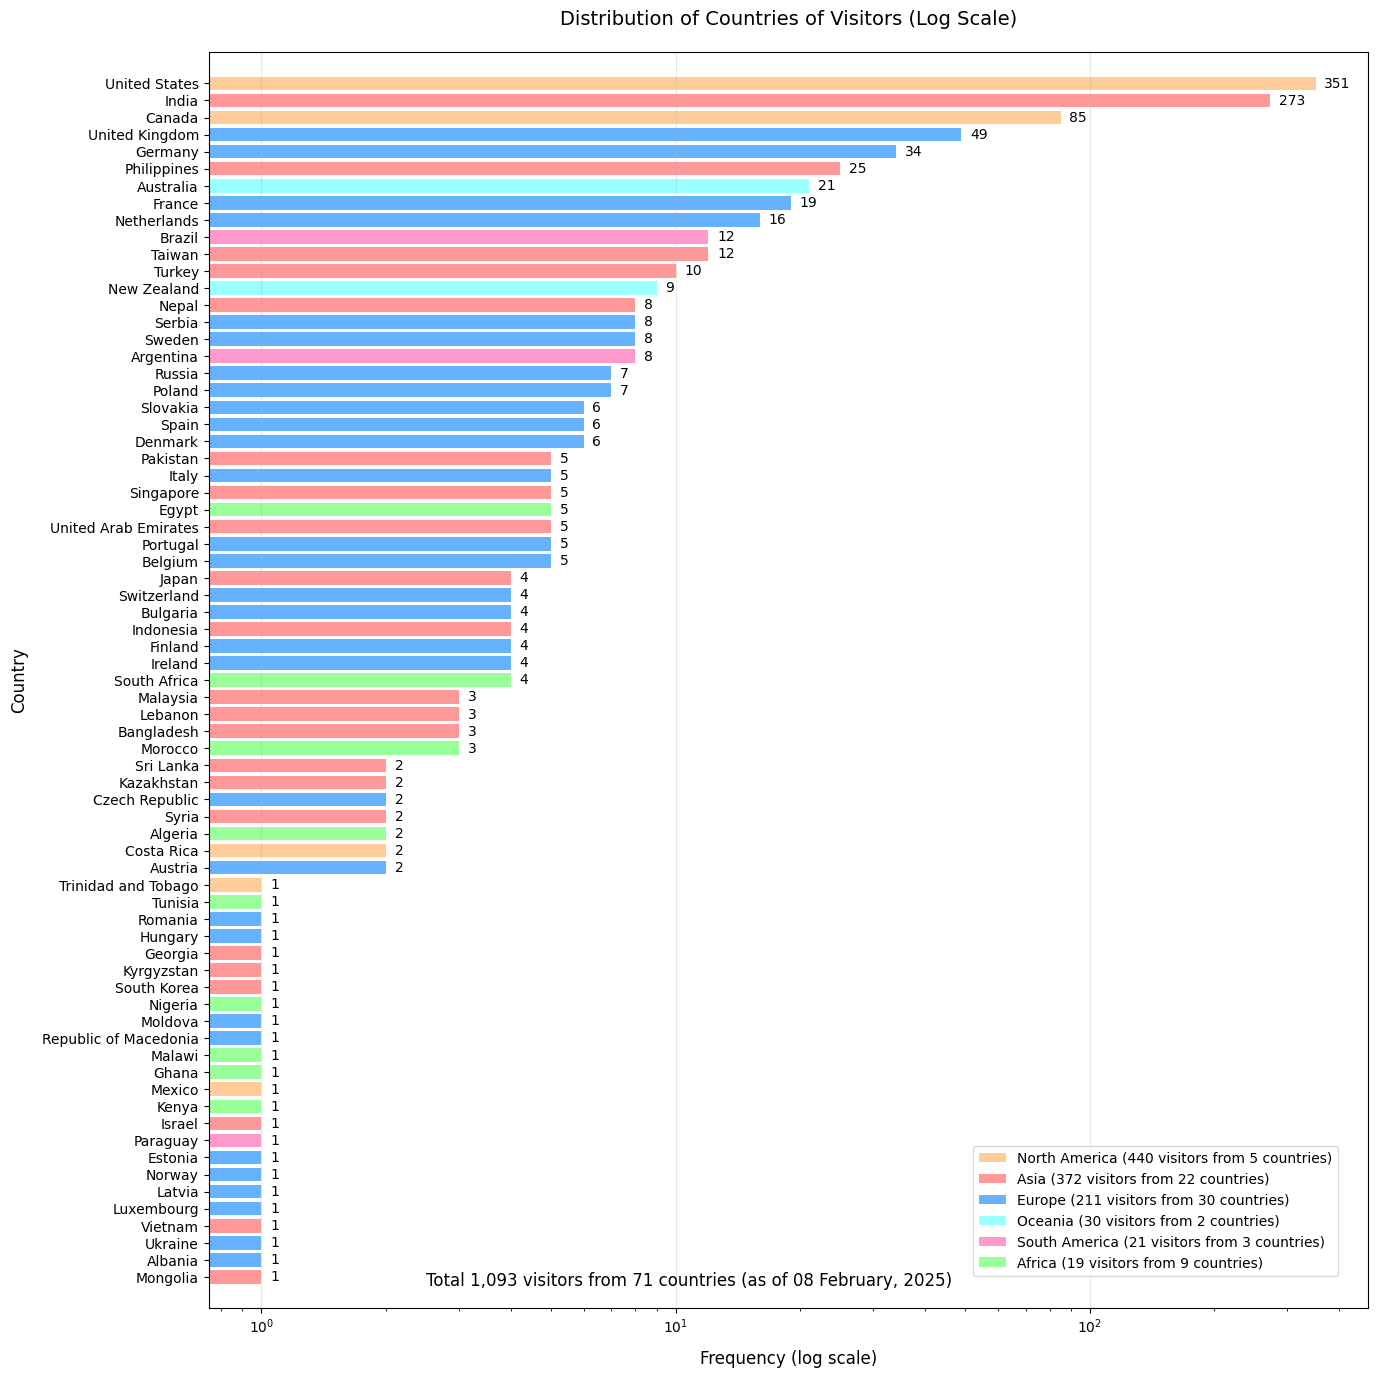

In [19]:
plt.figure(figsize=(14, 14))  

bars = plt.barh(list(sorted_countries.keys()), list(sorted_countries.values()), 
                height=0.8,  
                color=colors)

plt.xscale('log')

for bar in bars:
        width = bar.get_width()
        plt.text(width*1.05, 
                bar.get_y() + bar.get_height()/2,
                f'{int(width):,}', 
                ha='left', 
                va='center',
                fontsize=10)  

from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=continent_colors[continent], 
                        label=f'{continent} ({continent_count[continent]} visitors from {continent_country_count[continent]} countries)')
                for continent in sorted_continents.keys()]
plt.legend(handles=legend_elements, 
        loc='lower right', 
        bbox_to_anchor=(0.98, 0.02),
        fontsize=10)

plt.yticks(rotation=0, fontsize=10)
plt.title('Distribution of Countries of Visitors (Log Scale)', 
        pad=20, 
        fontsize=14
        )

plt.text(2.5, -0.5,  
        f'Total {total_visitors:,} visitors from {total_countries} countries (as of {x_date.strftime("%d %B, %Y")})', 
        fontsize=12)

plt.xlabel('Frequency (log scale)', fontsize=12, labelpad=10)
plt.ylabel('Country', fontsize=12, labelpad=10)

plt.margins(y=0.02)
plt.tight_layout(pad=1.5) 

plt.grid(True, axis='x', alpha=0.3)  

plt.savefig('country_distribution.png', 
        dpi=150, 
        bbox_inches='tight')
plt.show()
